<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Dispersion_Ondas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#librerias
import numpy as np #operaciones matemáticas
import matplotlib.pyplot as plt #libreria para gráficar

#Función para resolver la ecuación de dispersión, con entrada de h (profundidad) y T (periodo). Resultado: Celeridad
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

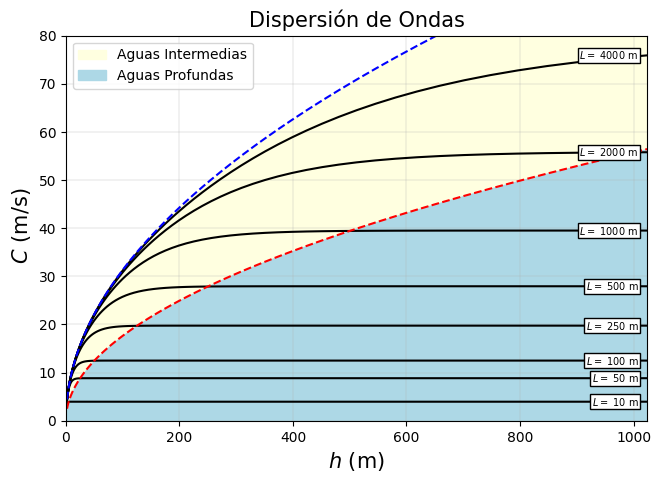

In [98]:
# Crearemos la figura a nuestra necesidad (antojo)
ancho = 7.5
alto  = 5
letra = 15

#Declaramos figura (fig) y eje (ax)
fig, ax = plt.subplots(figsize=(ancho,alto))

hmax = 800
dh = hmax/500
#h = np.arange(0+dh,hmax+dh,dh)
h =  np.logspace(1, 10, num=100, base=2)

L = np.array([10,50,100,250,500,1000,2000,4000])

C = np.zeros((len(L),len(h)))
for i in range(len(L)):
  g = 9.81 #gravedad (m/s2)
  k = 2*np.pi/L[i]
  C[i,:] = np.sqrt(g/k*np.tanh(k*h))
  ax.plot(h,C[i,:],'k')
  ax.text(0.985*np.max(h),C[i,-1],'$L = $ %0.0f m' % (L[i],),fontsize=letra-8,verticalalignment='center',horizontalalignment='right', bbox={
        'facecolor': 'white', 'alpha': 1, 'pad': 1})


ax.set_xlabel('$h$ (m)',fontsize=letra)
ax.set_ylabel(' $C$ (m/s)',fontsize=letra)
ax.set_title('Dispersión de Ondas',fontsize=letra)
ax.set_xlim(0,np.max(h))
ax.set_ylim(0,80)
#ax.axhline(y=-h, color='k')

#Aguas Profundas
L0 = 2*h
k0 = 2*np.pi/L0
C0 = np.sqrt(g/k0*np.tanh(k0*h))
ax.plot(h,C0,'r--')

##Aguas Someras
#Las = 25*h
#kas = 2*np.pi/Las
#Cas = np.sqrt(g/kas*np.tanh(kas*h))
#ax.plot(h,Cas,'g--')

#Aguas Someras
Csw = np.sqrt(g*h)
ax.plot(h,Csw,'b--')

ax.fill_between(h,Csw,C0,color='lightyellow',label='Aguas Intermedias')
ax.fill_between(h,C0,0,color='lightblue',label='Aguas Profundas')

ax.legend()
ax.grid(linewidth=0.25)
fig.savefig('Dispersion.png', bbox_inches="tight",dpi=300)

plt.show()